In [ ]:
# ATMS 305, Fall 2024 - Lab06: Earthquakes
# This one is longer than what we've done before.

In [1]:
# >> A: IMPORT / install needed modules for matplotlib, numpy, & cartopy
# you'll also need plotly and pandas, later.

import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import plotly.express as px
import pandas as pd
import numpy as np

In [3]:
# >> B: GET / read data for 7.0+ quakes since *2001*
# 1. Get the file: rfd.atmos.uiuc.edu/305/quakeLab05.csv
# 2. Read in with Pandas as in Lab05
# 3. Set the data set name to 'Quake Data' as in Lab05
# 4. Show the header/beginning data with .head() as in Lab05
!wget -q -O quakeLab05.csv rfd.atmos.uiuc.edu/305/quakeLab05.csv
quake = pd.read_csv('quakeLab05.csv')
quake.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-03-25T02:49:20.896Z,48.9688,157.6914,55.39,7.5,mww,NaN,12.0,4.104,0.67,...,2020-04-09T01:06:11.534Z,"221km SSE of Severo-Kuril'sk, Russia",earthquake,7.6,3.0,0.020,239.0,reviewed,us,us
1,2020-02-13T10:33:44.514Z,45.6147,148.9579,144.00,7.0,mww,NaN,25.0,4.501,0.84,...,2020-03-17T13:13:04.040Z,"94km ENE of Kuril'sk, Russia",earthquake,7.3,1.9,0.027,131.0,reviewed,us,us
2,2020-01-28T19:10:24.918Z,19.4193,-78.7560,14.86,7.7,mww,NaN,26.0,1.657,0.75,...,2020-04-11T18:21:03.040Z,"123km NNW of Lucea, Jamaica",earthquake,6.0,2.9,0.022,199.0,reviewed,us,us
3,2019-11-14T16:17:40.578Z,1.6213,126.4156,33.00,7.1,mww,NaN,11.0,1.271,1.15,...,2020-03-27T13:47:25.007Z,"138km E of Bitung, Indonesia",earthquake,6.1,1.7,0.036,75.0,reviewed,us,us
4,2019-07-14T09:10:51.523Z,-0.5858,128.0340,18.98,7.2,mww,NaN,38.0,1.504,0.88,...,2020-03-27T13:55:09.874Z,"93km NNE of Laiwui, Indonesia",earthquake,7.3,3.4,0.049,40.0,reviewed,us,us


Text(0.5, 1.0, 'C: Global 7+ Earthquakes since 2001')

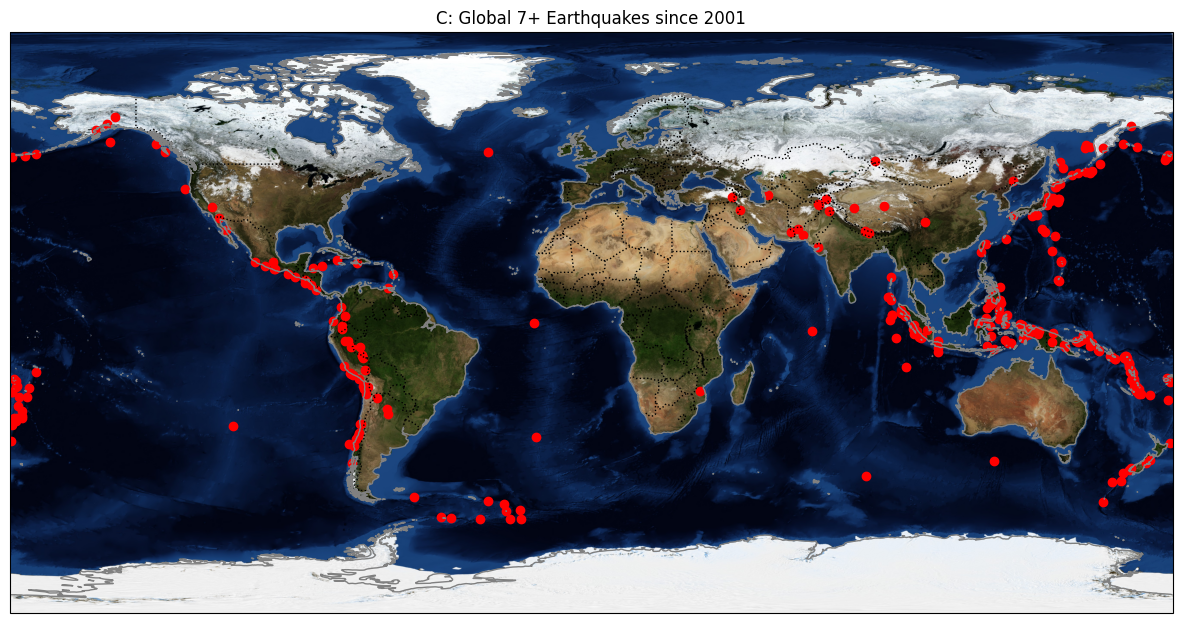

In [4]:
# >> C: MAP the 7.0 quakes on a global projection
#    Use the code from Lab05!!
#    Leave comments in -- below! Put code between comments!!!

# 1. Create the figure

# 2. Start projection with ax = plt.axes ...

# 3. Get a blue marble overlay image

# 4. Read in the blue marble image. Don't forget origin=, transform=, extent=

# 5. Add features: BORDERS, also coastlines and set_global for the plot domain.

# 6. Use ax.scatter() to show the quake locations in red.

# 7. Finish with the title: 'C: Global 7+ Earthquakes since 2001'
!wget -q -N https://eoimages.gsfc.nasa.gov/images/imagerecords/73000/73909/world.topo.bathy.200412.3x5400x2700.jpg

fig = plt.figure(figsize=(15, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

world = plt.imread("world.topo.bathy.200412.3x5400x2700.jpg")
ax.imshow(world, origin='upper', transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])

ax.add_feature(cfeature.BORDERS, linestyle=':');
ax.coastlines(color="gray",resolution='50m');
ax.set_global()

ax.scatter(quake.longitude,quake.latitude,color='red',
            transform=ccrs.PlateCarree())

ax.set_title('C: Global 7+ Earthquakes since 2001')

In [5]:
# >> D: SCATTER PLOT of depth vs. magnitude
#  FYI: quake columns documentation: https://earthquake.usgs.gov/data/comcat/
#  1. import plotly.express as px  (if you haven't already)
#  2. Use plotly.express to make a px.scatter plot
#    a) Call it like this:  fig = px.scatter(quake , option, option... )
#          ... we'll use the "fig" part soon to add a title.
#    b) Use X axis to be the quake depth (.depth) like this: "x=quake.depth"
#    c) Use the Y axis to be the magnitude (.mag)
#    d) Use color = the longitude from your quake data
#    e) Use size = to be the .index (which runs backwards from 2023 to 2001)
#    f) Add title: D: 7+ Earthquake magnitude vs. depth, 2001-2023
#       .. Do this AFTER the fig=px.scatter ... statement, like this:
#          fig.update_layout(title_text='...my title...');
#    g) You may need to add fig.show() to see the figure
#
#  NOTES: - mouse over the figure! highest mag = 9.1, depth 29, at 142.373 E longitude.
#         - often shallow quakes are worse, more info here:
#     https://www.businessinsider.com/ap-ap-explains-difference-between-shallow-deep-earthquakes-2016-8

fig = px.scatter(quake,
                 x = quake.depth,
                 y = quake.mag,
                 color = quake.longitude,
                 size = quake.index
)

fig.update_layout(title_text='D: 7+ Earthquake magnitude vs. depth, 2001-2023')
fig.show()

In [6]:
# >> E: SCATTER plot of number of stations vs. magnitude uncertainty
#  1. use px.scatter again
#  2. X axis: magNst field (number of seismic stations)
#  3. Y axis: magError (uncertainty)
#  4. color: set from longitude again
#  5. Add title: E: 2001-2023 Seismic station count vs. mag error
#
#  NOTES:
#    You will see lower uncertainty (stored as magError) with more seismic stations.
#    The top/left dot - largest error - has magNst=16, magError 0.078.
#    If you mouse over the "fig=px.scatter.." code, you'll see little histograms appear
#      over each variable (e.g.: y=quake.something)

fig = px.scatter(quake,
                 x = quake.magNst,
                 y = quake.magError,
                 color = quake.longitude,
                 size = quake.index
)

fig.update_layout(title_text='E: 2001-2023 Seismic station count vs. mag error')
fig.show()

In [7]:
# >> F: MASKING to only select north/west hemisphere
#  1. You can create a mask to restrict the data that is used.
#       Do this as: mask = (one requirement) & (another requirement)
#       For example, we could do this (but this isn't what we're doing!):
#          mask = (quake.XYZ > 4) & (quake.ABC < 50)   # not real names!
#          quakeXYZABC = quake[mask]    # our restricted/limited data set
#
#  2. Here, mask YOUR data to choose the Earth's northwest hemisphere;
#       so longitude must be negative and latitude must be positive.
#       call the masked data (I used quakeXYZABC above) something besides 'quake' !!
#
#  3. Repeat ONE of your scatter plots above (with color from longitude)
#       ... when doing cut/paste, make sure you use your MASKED data!!

#  4. Add TITLE:  F: NW 7+ (add your variables e.g. mag vs depth) 2001-2023
#     ** you may need fig.show() to see the figure.
#
# NOTES: note the longitude scale on right runs ~-40 to ~-170, unlike the full
#  scale in the last few cells.  That's a sign that your masking worked.

mask = (quake.longitude < 0) & (quake.latitude > 0)
quakeNW = quake[mask]

fig = px.scatter(quakeNW,
                 x = quakeNW.magNst,
                 y = quakeNW.magError,
                 color = quakeNW.longitude,
                 size = quakeNW.index
)

fig.update_layout(title_text='F: NW 7+ Seismic station count vs. mag error 2001-2023')
fig.show()

Text(0.5, 1.0, 'G: NW 7+ earthquakes 2001-2023')

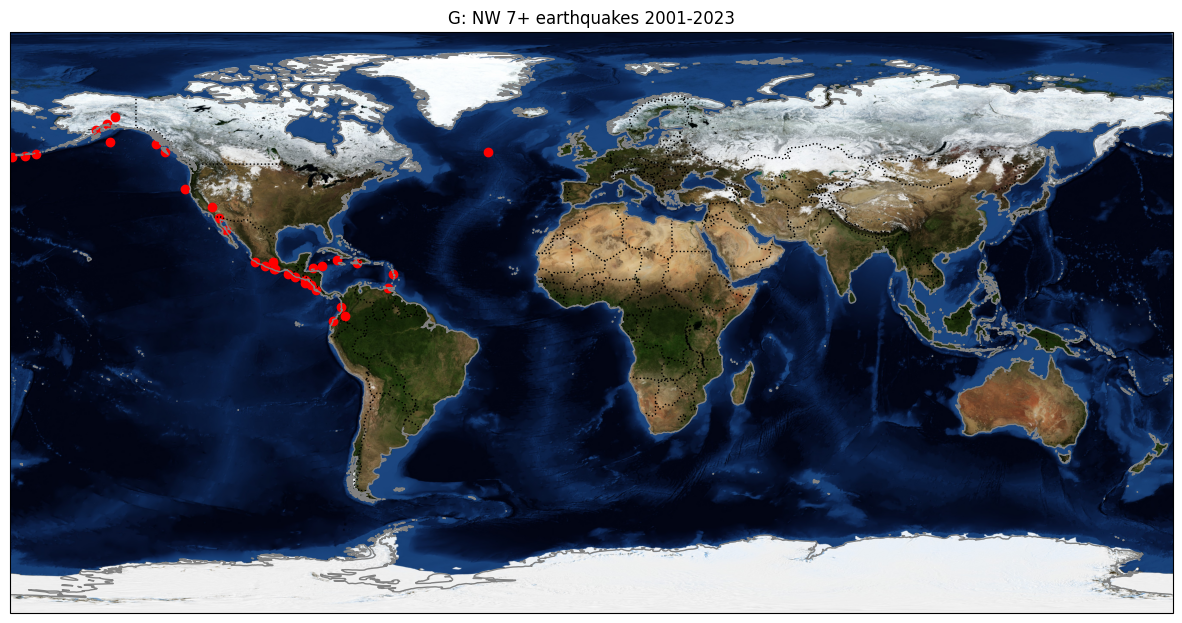

In [8]:
# >> G: MAP your masked data
# 1. Repeat the global map from before, but use your MASKED data instead of 'quake'
#
# 2. If you've used/run the earlier map cell recently, you DON'T
#      have to re-WGET the blue marble image, or re-IMREAD it;
#      you already have it.  You DO have to show it (ax.imshow...) though.
#
# 3. Use title:  G: NW 7+ earthquakes 2001-2023
#
# NOTES: If you used your masked data, and the mask worked ... then your map
#      should now show quake dots only for negative longitude, positive latitude.
#      If your map looks the same as the earlier map, you are using the 'full' quake
#      data set name, instead of the masked data set.

fig = plt.figure(figsize=(15, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.imshow(world, origin='upper', transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])

ax.add_feature(cfeature.BORDERS, linestyle=':');
ax.coastlines(color="gray",resolution='50m');
ax.set_global()

ax.scatter(quakeNW.longitude,quakeNW.latitude,color='red',
            transform=ccrs.PlateCarree())

ax.set_title('G: NW 7+ earthquakes 2001-2023')

In [9]:
# >> H: READ earthquake data for Northridge earthquake
#  1. Northridge -- Mag 6.7, 20 mi from Los Angeles, 1/17/1994
#  2. Epicenter: 34.21 N, 118.5 W
#
#  3. File: rfd.atmos.uiuc.edu/305/EarthquakeNorthridge.csv
#       ... this data is for all magnitudes > 0.5
#
#  4. Get the file, read the data into Pandas variable "nr" (or NR)
#  5. Use .head as before for a quick summary
#
# NOTES: you should see "5 rows x 22 columns" and the first entry
#   is at latitude 34.3640, magnitude 3.15.

!wget -q -O EarthquakeNorthridge.csv rfd.atmos.uiuc.edu/305/EarthquakeNorthridge.csv

nr = pd.read_csv('EarthquakeNorthridge.csv')
nr.head

<bound method NDFrame.head of                           time   latitude   longitude   depth   mag magType  \
0     1994-01-19T23:59:53.580Z  34.364000 -118.700000  10.893  3.15      ml   
1     1994-01-19T23:58:34.210Z  42.325500 -121.986667  -0.363  2.00      md   
2     1994-01-19T23:57:54.640Z  34.362000 -118.690000   2.954  2.20      mc   
3     1994-01-19T23:57:04.800Z  34.357000 -118.478000  -0.834  2.09      mc   
4     1994-01-19T23:54:06.740Z  34.186000 -118.366000  28.441  2.18      mc   
...                        ...        ...         ...     ...   ...     ...   
1826  1994-01-15T00:49:07.210Z  39.288333 -123.246833   4.006  1.63      md   
1827  1994-01-15T00:45:00.580Z  34.488000 -116.451000   1.808  2.61      mc   
1828  1994-01-15T00:39:01.950Z  37.638833 -118.920167   6.211  0.93      md   
1829  1994-01-15T00:29:03.060Z  35.749000 -117.679000  10.134  0.65      mc   
1830  1994-01-15T00:01:24.010Z  42.271667 -121.892667   3.924  1.60      md   

      nst    gap     

Text(0.5, 0, 'Magnitude')

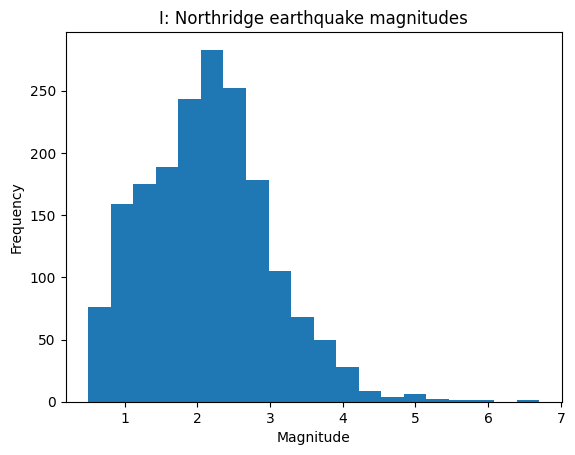

In [10]:
# >> I: HISTOGRAM of magnitudes.
#  1. Use nr.mag.plot() to plot a northridge histogram with bins=20
#       ... i.e. inside the parentheses, put: kind='hist', bins=20
#       ... so not doing plt.hist() here. "nr" is our data,
#           nr.mag is the mag data, and nr.mag.plot( ) plots it!
#
#  2. Add title:  I: Northridge earthquake magnitudes (use plt.title)
#  3. Add xlabel 'Magnitude' with plt.xlabel; ylabel is already done for you.
#
# Pandas histogram documentation:
#   https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html
#
#  NOTES: the peak (mag 6.7) is way out at the tail on right side!
#         Max frequency of occurrence is ~ the 2.0 to 2.5 values.
#

nr.mag.plot(kind='hist', bins=20)
plt.title('I: Northridge earthquake magnitudes')
plt.xlabel('Magnitude')


In [11]:
# >> J: MASK creation for the Northridge data
#  1. Make a mask restricting the data to
#         longitude between -120 and -113
#         latitude between 30 and 40
#       ... that's 4 restrictions on the data, e.g.
#       mask = (  ) & (  ) & \
#               (  ) & (  )
#  2. Create a Northridge subset with this mask, call it 'nearby'
#
#  3. Reuse your earlier code to make a (plotly) scatterplot,
#       X axis = depth, Y axis = magnitude, color by the 'nearby' .index
#       so later/most recent quakes are darker, and lighter = earlier times
#       Remember to USE the NEARBY data, not the full data set "nr"
#
#  4. Add title: J: 1994 Northridge earthquake magnitude vs. depth
#
# NOTES: mouse over the data!  See the 6.7 magnitude quake among all the others?
maskNR = (nr['longitude'] > -120) & (nr['longitude'] < -113) & (nr['latitude'] > 30) & (nr['latitude'] < 40)
nearby = nr[maskNR]

# Create the scatter plot with depth on the X-axis, magnitude on the Y-axis, and color by the index (time-order)
fig = px.scatter(
    nearby,
    x='depth',
    y='mag',
    color=nearby.index,
    size=nearby.index,
)

fig.update_layout(title_text='J: 1994 Northridge earthquake magnitude vs. depth')
fig.show()

Text(0.5, 1.0, 'K: Northridge 2km')

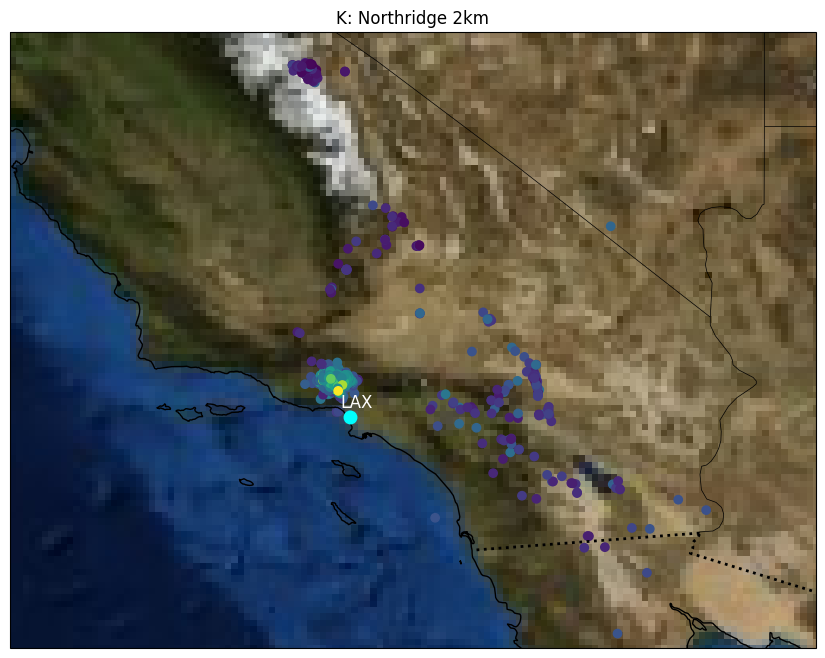

In [14]:
# >> K: MAP the Northridge earthquake: USE 'NEARBY' DATA
#
#  1. Start a figure; I used 15x8" but you choose what works for you.
#  2. Choose a projection; I used PlateCarree
#
#  3. For background, I used the 'world' image from before.
#  4. Add states_provinces from Natural Earth; I used edgecolor black, zorder=10
#
#  5. Add cfeature BORDERS, linewidth=2, linestyle=your choice
#  6. Add coastlines, resolution 1:10,000,000
#
#  7. Use set_extent for a limited domain from -122 to -113.5 longitude, 31.5 to 38 latitude
#     This also means to Not use set_global !!!
#
#  8. Add a scatter plot with your 'nearby' quake data,
#       using the longitude & latitude, and colored by magnitude.
#
#  9. Add a cyan-colored marker for the Los Angeles airport with ax.plot, like this:
#          ax.plot(-118.41,33.94,color='cyan',marker='o',
#              markersize=9,transform=ccrs.PlateCarree())
# 10. Use ax.text to show text 'LAX', fontsize=12, c='white', and offset it
#       from the above marker by adding 0.1 degrees to the above (<0) longitude,
#       and also subtract 0.1 from latitude
#
# 11. Add title:  K: Northridge 2km
#
# NOTES:
#   You should see a cyan dot, with white LAX just to the right of it.
#   There are a lot of weaker quakes, but the big one appears in yellow
#   (in my notebook) just north/west of LAX.

fig = plt.figure(figsize=(15, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.imshow(world, origin='upper', transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])

states_provinces = cfeature.NaturalEarthFeature(category='cultural', 
                                                name='admin_1_states_provinces_lines', 
                                                scale='50m', 
                                                linewidth=0.5, 
                                                facecolor='none')

ax.add_feature(states_provinces, edgecolor='black', zorder=10)
ax.add_feature(cfeature.BORDERS, linewidth=2, linestyle=':')
ax.coastlines(resolution='10m');
ax.set_extent([-122, -113.5, 31.5, 38])

ax.scatter(nearby['longitude'], nearby['latitude'], c=nearby['mag'], transform=ccrs.PlateCarree())
ax.plot(-118.41,33.94, color='cyan', marker='o', markersize=9, transform=ccrs.PlateCarree())
ax.text(-118.41 - 0.1, 33.94 + 0.1, 'LAX', fontsize=12, c='white')
ax.set_title('K: Northridge 2km')

In [ ]:
# >> L: GET and Read data for a (different) significant earthquake.
#  1. Select a notable (mag 6+) quake since 1960 that is NOT in the Los Angeles area.
#     Ideas: https://www.usgs.gov/programs/earthquake-hazards/special-earthquakes-earthquake-sequences-and-fault-zones
#            https://en.wikipedia.org/wiki/Lists_of_earthquakes#Largest_earthquakes_by_magnitude
#  2. Go to this site: https://earthquake.usgs.gov/earthquakes/search/
#  3. Choose the start and end, e.g. +/- a few days surrounding your case.
#  4. Choose minimum magnitude - e.g. 7.0
#  5. Choose output option CSV; Search.
#     If there aren't a bunch of quakes (say, at least 10) as part of this event,
#     Choose another event or change your criteria!!
#  6. Upload the data to this Colab notebook work space, as you would a .ipynb file to convert to HTML.
# > So you don't actually run any Python in this cell!!!

In [15]:
# >> M: READ DATA and SHOW HEADER INFO
#  1. Read the data with Pandas (you don't need wget: it should already be in your Colab notebook space!)
#  2. Rename the data - pick a name (in quotes) that represents YOUR event (e.g. Alaska Quake)
#  3. Use .head to get a quick look at your data.
#  4. You'll use this data later :)

# Northern Sumatra
NS = pd.read_csv('query.csv')
NS.head

<bound method NDFrame.head of                         time  latitude  longitude  depth  mag magType  nst  \
0   2004-12-29T05:56:47.540Z     8.791     93.198   12.0  6.2     mwb  364   
1   2004-12-29T01:50:52.570Z     9.109     93.756    8.0  6.1     mwb  442   
2   2004-12-27T09:39:06.800Z     5.348     94.650   35.0  6.1     mwb  468   
3   2004-12-26T19:19:55.570Z     2.794     94.162   30.0  6.1     mwc  135   
4   2004-12-26T15:06:33.240Z     3.651     94.086   17.8  6.0     mwc  181   
5   2004-12-26T11:05:00.720Z    13.533     92.840   13.3  6.2     mwc  462   
6   2004-12-26T10:19:31.730Z    13.462     92.738   26.4  6.3     mwc  389   
7   2004-12-26T09:20:01.610Z     8.879     92.375   16.1  6.6     mwc  353   
8   2004-12-26T04:21:29.810Z     6.910     92.958   39.2  7.2     mwc  385   
9   2004-12-26T02:00:40.030Z     6.848     94.667   30.0  6.0      mb  264   
10  2004-12-26T01:25:48.760Z     5.499     94.213   30.0  6.1      mb   82   
11  2004-12-26T01:22:25.590Z     7

In [ ]:
# USE THIS cell to SAVE NOTEBOOK as HTML
# >>> FIRST STOP ANY RUNNING ANIMATION <<<  then save the notebook.
#
# 1. LEAVE this cell COMMENTED OUT until your code works.
# 2. Still with this commented out, save notebook.ipynb file to your PC.
# 3. Upload the .ipynb file from your PC to Colab space
# 4. NOW uncomment this cell
# 5. Change filename below (after "--to html") to this notebook's name
# 6. Run JUST this cell.
# 7. Find the new .html file; Refresh the Colab file list if need be
# 8. Save (from 3-dots) the .html file to your PC.
# 9. Upload both the .ipynb and the .html files to MOODLE.
# %%shell
# jupyter nbconvert --to html  YourNotebookName.ipynb